In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks
import math

In [2]:
datafile = 'truecode-metrics-december-2023.csv'

SYMBOLS = [ 'Strategy', 'Bitcoin', 'SPY', 'QQQ']

SYMBOL_COLORS = {
    'Strategy': '#CAB145',
    'Bitcoin': '#567DC5', 
    'SPY': '#dddddd', 
    'QQQ': '#C0C0C0', 
}

SYMBOL_LINEWIDTH = {
    'Strategy': '4',
}


SYMBOLS, SYMBOL_COLORS, SYMBOL_LINEWIDTH


(['Strategy', 'Bitcoin', 'SPY', 'QQQ'],
 {'Strategy': '#CAB145',
  'Bitcoin': '#567DC5',
  'SPY': '#dddddd',
  'QQQ': '#C0C0C0'},
 {'Strategy': '4'})

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-12-31')

In [4]:
# BITCOIN-FUND is Bitcoin metrics over the same time period as the Fund
# BITCOIN-COMBINED is Bitcoin metrics over the same time period as the combined Fund and Family Office Account
PITCH_DECK_METRICS = {
    'FUND': {},
    'COMBINED': {},
    'BITCOIN-FUND': {},
    'BITCOIN-COMBINED': {},
    'SPY': {},
    'QQQ': {},
}

# Font Configuration

If you receive an exception for Roboto Condensed or Roboto, stop here and fix the font configuration.

In [5]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: "/usr/local/etc/fonts/fonts.conf", line 86: unknown element "blank"


['/Library/Fonts/AdobeHebrew-Regular.otf',
 '/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf',
 '/Library/Fonts/CooperBlackStd-Italic.otf',
 '/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifYezidi-Regular.otf',
 '/Library/Fonts/Foliage-Regular.ttf',
 '/System/Library/Fonts/Geneva.ttf',
 '/Library/Fonts/Microsoft/Times New Roman Bold.ttf',
 '/System/Library/Fonts/Keyboard.ttf',
 '/System/Library/Fonts/SFCompact.ttf',
 '/System/Library/Fonts/SFNSMono.ttf',
 '/Library/Fonts/TrajanPro-Regular.otf',
 '/Users/jmp/Library/Fonts/Roboto-BoldItalic.ttf',
 '/Library/Fonts/BlackoakStd.otf',
 '/Library/Fonts/Microsoft/Gulim.ttf',
 '/Library/Fonts/Wildberry-Regular.ttf',
 '/Library/Fonts/Microsoft/Franklin Gothic Medium.ttf',
 '/Library/Fonts/Microsoft/Marlett.ttf',
 '/Library/Fonts/Microsoft/Candara.ttf',
 '/Library/Fonts/MyriadPro-Cond.otf',
 '/Library/Fonts/Microsoft/Arial Italic.ttf',
 '/Library/Fonts/ACaslonPro-Italic.otf',
 

In [6]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

findfont: Font family ['Roboto Condensed'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


'/Users/jmp/.pyenv/versions/3.8.2/envs/truecode_metrics/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Configure Charts

In [7]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 2,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [8]:
prices = pd.read_csv(datafile)
print(prices)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

            Date    Strategy     Bitcoin         SPY         QQQ
0     12/19/2019 10,000.0000 10,000.0000 10,000.0000 10,000.0000
1     12/20/2019 10,036.1900 10,052.4900  9,994.7000 10,040.3100
2     12/21/2019  9,981.8100  9,975.4600  9,994.7000 10,040.3100
3     12/22/2019 10,342.4300 10,491.0800  9,994.7000 10,040.3100
4     12/23/2019 10,163.9500 10,233.2600 10,009.9700 10,045.0500
...          ...         ...         ...         ...         ...
1469  12/27/2023 70,415.1800 61,653.1700 14,849.1700 19,515.3200
1470  12/28/2023 68,110.3700 60,425.0600 14,854.7800 19,505.8300
1471  12/29/2023 66,156.7600 59,719.7700 14,811.7800 19,421.4200
1472  12/30/2023 66,180.9800 59,823.8700 14,811.7800 19,421.4200
1473  12/31/2023 66,352.6000 60,027.3100 14,811.7800 19,421.4200

[1474 rows x 5 columns]


In [9]:
prices[['Strategy', 'Bitcoin', 'SPY', 'QQQ']]

,Strategy,Bitcoin,SPY,QQQ
Date,,,,
2019-12-19,"10,000.0000","10,000.0000","10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900","9,994.7000","10,040.3100"
2019-12-21,"9,981.8100","9,975.4600","9,994.7000","10,040.3100"
2019-12-22,"10,342.4300","10,491.0800","9,994.7000","10,040.3100"
2019-12-23,"10,163.9500","10,233.2600","10,009.9700","10,045.0500"
...,...,...,...,...
2023-12-27,"70,415.1800","61,653.1700","14,849.1700","19,515.3200"
2023-12-28,"68,110.3700","60,425.0600","14,854.7800","19,505.8300"
2023-12-29,"66,156.7600","59,719.7700","14,811.7800","19,421.4200"


# Fund Statistics

In [10]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[SYMBOLS].calc_stats()

PITCH_DECK_METRICS['FUND']['Month to Date'] = stats['Strategy'].mtd
PITCH_DECK_METRICS['BITCOIN-FUND']['Month to Date'] = stats['Bitcoin'].mtd
PITCH_DECK_METRICS['SPY']['Month to Date'] = stats['SPY'].mtd
PITCH_DECK_METRICS['QQQ']['Month to Date'] = stats['QQQ'].mtd

PITCH_DECK_METRICS['FUND']['Year to Date'] = stats['Strategy'].ytd
PITCH_DECK_METRICS['BITCOIN-FUND']['Year to Date'] = stats['Bitcoin'].ytd
PITCH_DECK_METRICS['SPY']['Year to Date'] = stats['SPY'].ytd
PITCH_DECK_METRICS['QQQ']['Year to Date'] = stats['QQQ'].ytd

PITCH_DECK_METRICS['FUND']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-FUND']['CAGR'] = stats['Bitcoin'].cagr

stats.display()

Stat                 Strategy    Bitcoin     SPY         QQQ
-------------------  ----------  ----------  ----------  ----------
Start                2022-05-01  2022-05-01  2022-05-01  2022-05-01
End                  2023-12-31  2023-12-31  2023-12-31  2023-12-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         35.57%      14.06%      15.37%      30.73%
Daily Sharpe         0.58        0.35        0.45        0.64
Daily Sortino        0.95        0.55        0.73        1.04
CAGR                 20.02%      8.21%       8.95%       17.44%
Max Drawdown         -32.35%     -59.64%     -17.02%     -21.91%
Calmar Ratio         0.62        0.14        0.53        0.80

MTD                  18.32%      12.09%      4.14%       5.32%
3m                   48.70%      56.82%      11.19%      14.30%
6m                   32.56%      38.76%      7.23%       10.85%
YTD                  61.96%      155.61%     24.29%      53.79%
1Y                   61.96%      155

/Users/jmp/code/truecode_metrics/graph-returns-fund.pdf

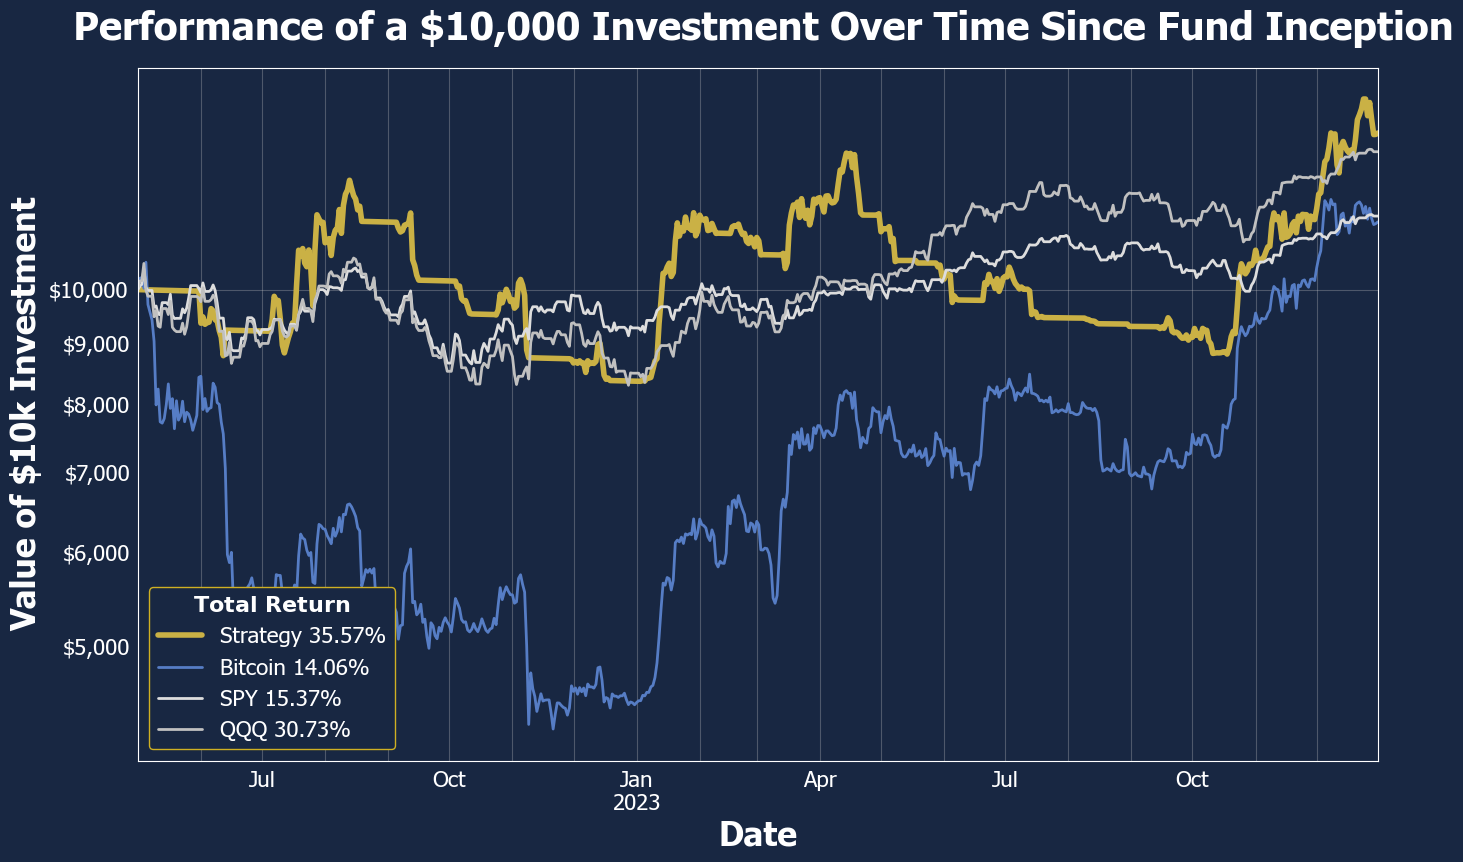

In [11]:
ax = sample[SYMBOLS].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')
display(FileLink('graph-returns-fund.pdf'))



# Combined Family Office Account + Fund History Statistics

In [12]:
stats = prices[SYMBOLS].calc_stats()
PITCH_DECK_METRICS['COMBINED']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-COMBINED']['CAGR'] = stats['Bitcoin'].cagr
PITCH_DECK_METRICS['SPY']['CAGR'] = stats['SPY'].cagr
PITCH_DECK_METRICS['QQQ']['CAGR'] = stats['QQQ'].cagr

PITCH_DECK_METRICS['COMBINED']['Daily Sortino'] = stats['Strategy'].daily_sortino
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Daily Sortino'] = stats['Bitcoin'].daily_sortino
PITCH_DECK_METRICS['SPY']['Daily Sortino'] = stats['SPY'].daily_sortino
PITCH_DECK_METRICS['QQQ']['Daily Sortino'] = stats['QQQ'].daily_sortino

PITCH_DECK_METRICS['COMBINED']['Calmar'] = stats['Strategy'].calmar
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Calmar'] = stats['Bitcoin'].calmar
PITCH_DECK_METRICS['SPY']['Calmar'] = stats['SPY'].calmar
PITCH_DECK_METRICS['QQQ']['Calmar'] = stats['QQQ'].calmar

PITCH_DECK_METRICS['COMBINED']['Max Drawdown'] = stats['Strategy'].max_drawdown
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Max Drawdown'] = stats['Bitcoin'].max_drawdown
PITCH_DECK_METRICS['SPY']['Max Drawdown'] = stats['SPY'].max_drawdown
PITCH_DECK_METRICS['QQQ']['Max Drawdown'] = stats['QQQ'].max_drawdown

PITCH_DECK_METRICS['COMBINED']['Total Return'] = stats['Strategy'].total_return
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Total Return'] = stats['Bitcoin'].total_return
PITCH_DECK_METRICS['SPY']['Total Return'] = stats['SPY'].total_return
PITCH_DECK_METRICS['QQQ']['Total Return'] = stats['QQQ'].total_return

PITCH_DECK_METRICS['COMBINED']['Volatility'] = stats['Strategy'].yearly_vol
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Volatility'] = stats['Bitcoin'].yearly_vol
PITCH_DECK_METRICS['SPY']['Volatility'] = stats['SPY'].yearly_vol
PITCH_DECK_METRICS['QQQ']['Volatility'] = stats['QQQ'].yearly_vol

PITCH_DECK_METRICS['COMBINED']['Sharpe'] = stats['Strategy'].daily_sharpe
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Sharpe'] = stats['Bitcoin'].daily_sharpe
PITCH_DECK_METRICS['SPY']['Sharpe'] = stats['SPY'].daily_sharpe
PITCH_DECK_METRICS['QQQ']['Sharpe'] = stats['QQQ'].daily_sharpe

stats.display()

Stat                 Strategy    Bitcoin     SPY         QQQ
-------------------  ----------  ----------  ----------  ----------
Start                2019-12-19  2019-12-19  2019-12-19  2019-12-19
End                  2023-12-31  2023-12-31  2023-12-31  2023-12-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         563.53%     500.27%     48.12%      94.21%
Daily Sharpe         1.14        0.84        0.45        0.62
Daily Sortino        1.93        1.35        0.68        0.95
CAGR                 59.88%      55.96%      10.23%      17.89%
Max Drawdown         -32.35%     -76.28%     -34.10%     -35.62%
Calmar Ratio         1.85        0.73        0.30        0.50

MTD                  18.32%      12.09%      4.14%       5.32%
3m                   48.70%      56.82%      11.19%      14.30%
6m                   32.56%      38.76%      7.23%       10.85%
YTD                  61.96%      155.61%     24.29%      53.79%
1Y                   61.96%      155

/Users/jmp/code/truecode_metrics/graph-returns-all.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

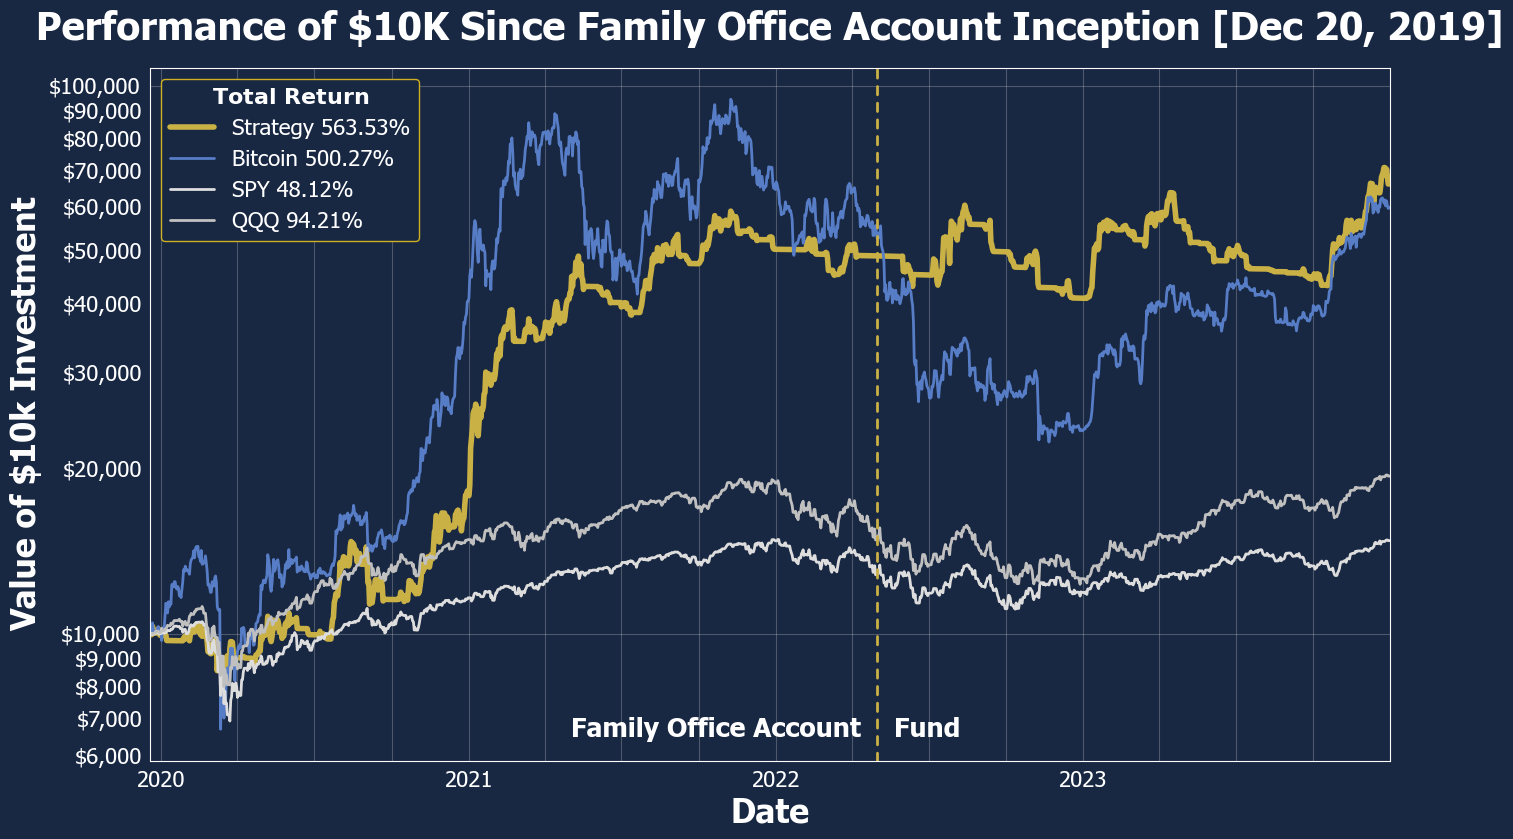

<Figure size 1600x900 with 0 Axes>

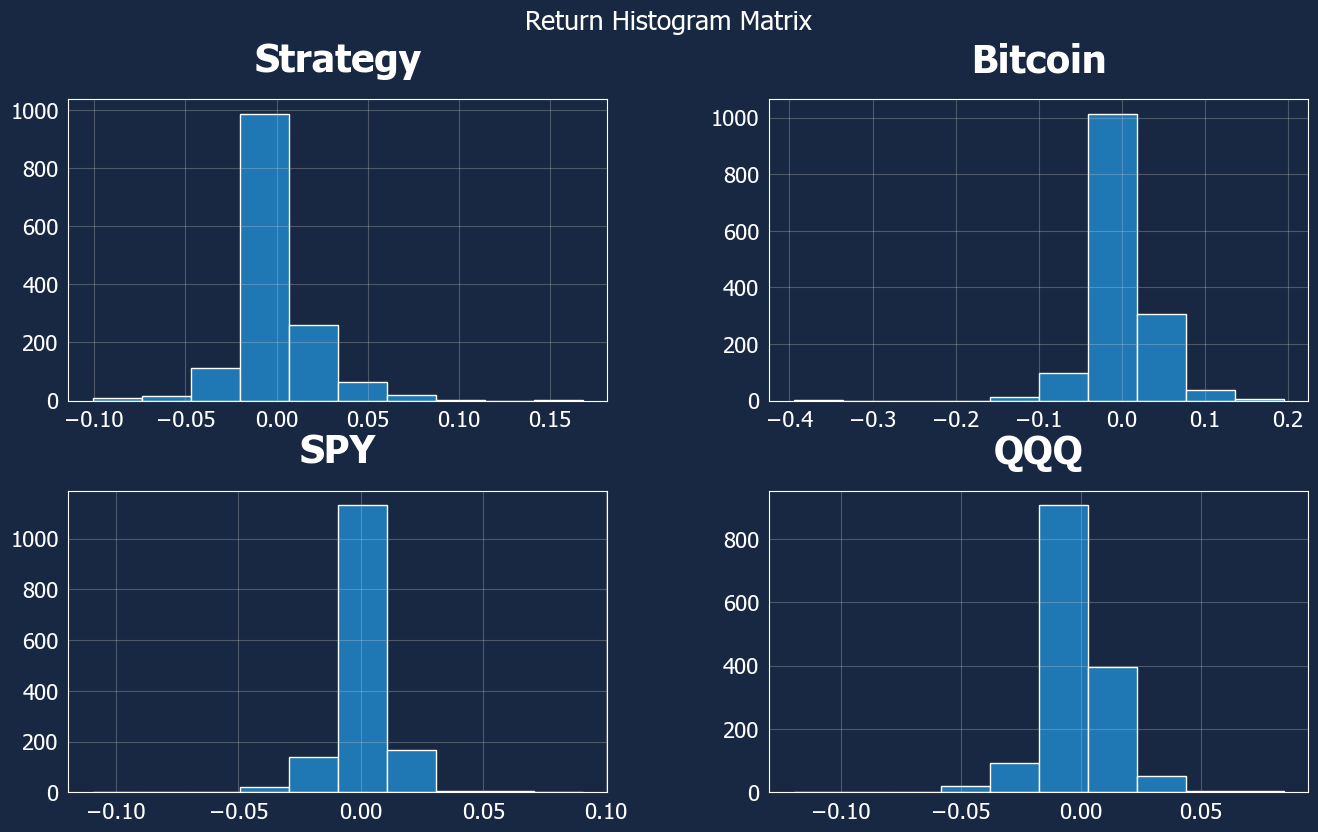

In [13]:
ax = prices[SYMBOLS].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = prices[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='upper left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')
display(FileLink('graph-returns-all.pdf'))

sample_stats.plot_histograms(figsize=(16, 9))

/Users/jmp/code/truecode_metrics/graph-returns-2022-bear-market.pdf

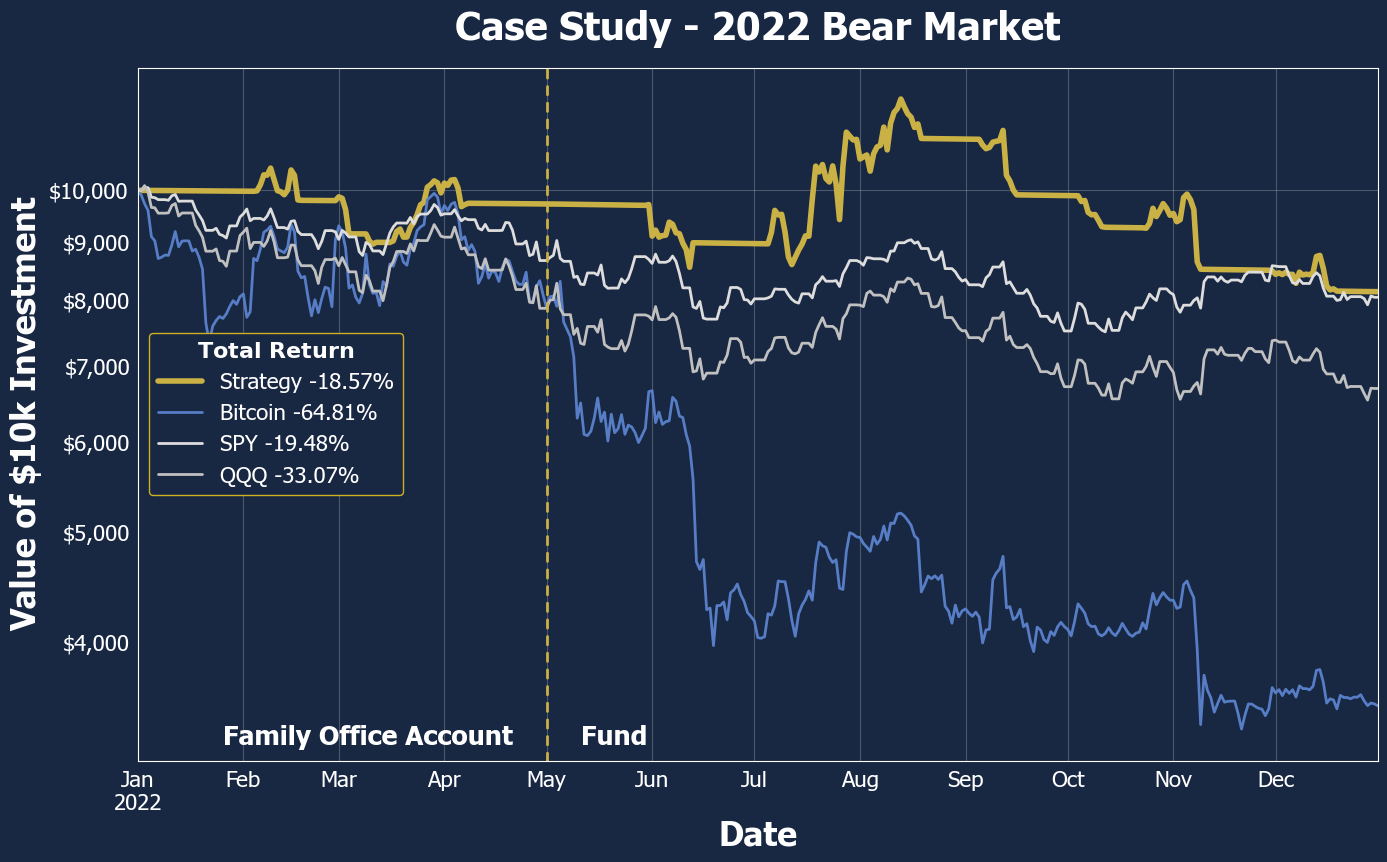

In [14]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[SYMBOLS], value=10000)
ax = rebased_sample[SYMBOLS].plot.line(title='Case Study - 2022 Bear Market', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = rebased_sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(total_returns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(total_returns['QQQ'] * 100.)
    ), 
    loc='center left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=10), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=10), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')
display(FileLink('graph-returns-2022-bear-market.pdf'))


/Users/jmp/code/truecode_metrics/drawdowns.pdf

/Users/jmp/code/truecode_metrics/drawdowns.csv

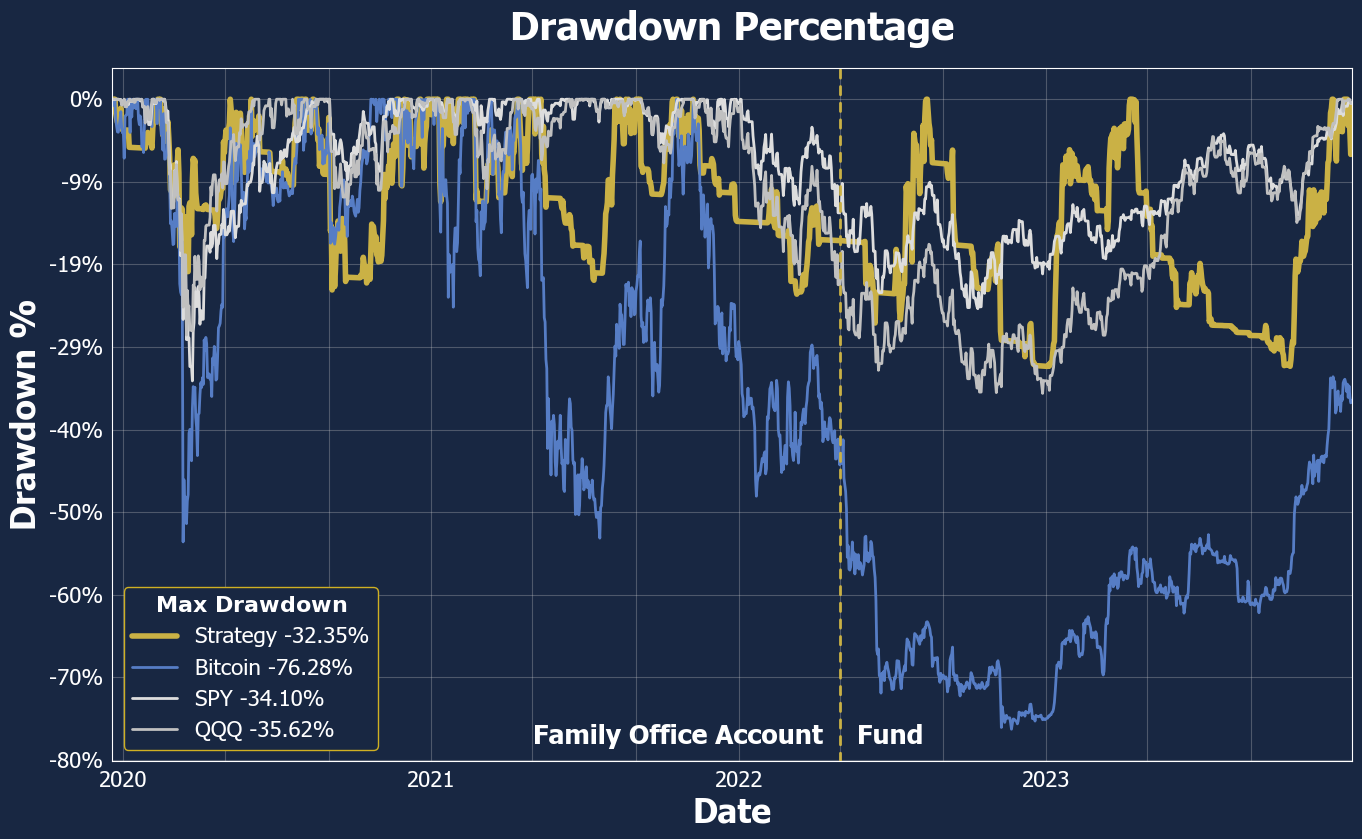

In [15]:
rebased_sample = ffn.rebase(prices[SYMBOLS], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color=SYMBOL_COLORS)
rebased_drawdown_stats = rebased_sample[SYMBOLS].calc_stats()

# rebased_drawdown_stats.display()
for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

max_drawdowns = {}
for symbol in SYMBOLS:
    max_drawdowns[symbol] = rebased_drawdown_stats[symbol].stats['max_drawdown']

ax.legend(
    (
        'Strategy {:.2f}%'.format(max_drawdowns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(max_drawdowns['Bitcoin'] * 100.), 
        'SPY {:.2f}%'.format(max_drawdowns['SPY'] * 100.), 
        'QQQ {:.2f}%'.format(max_drawdowns['QQQ'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

fig.savefig('drawdowns.pdf')
display(FileLink('drawdowns.pdf'))

drawdowns.to_csv('drawdowns.csv')
display(FileLink('drawdowns.csv'))



In [16]:
# strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(pd.DataFrame.pct_change, freq='M')
strategy_monthly_returns = prices['Strategy'].pct_change(freq='M')

strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date
2019-12-19      NaN
2019-12-20      NaN
2019-12-21      NaN
2019-12-22      NaN
2019-12-23      NaN
              ...  
2023-12-27      NaN
2023-12-28      NaN
2023-12-29      NaN
2023-12-30      NaN
2023-12-31   0.1832
Name: Strategy, Length: 1474, dtype: float64

# Calculate VaR

Bitcoin VaR = 0.05221774709290874
Strategy VaR = 0.030377486940471085


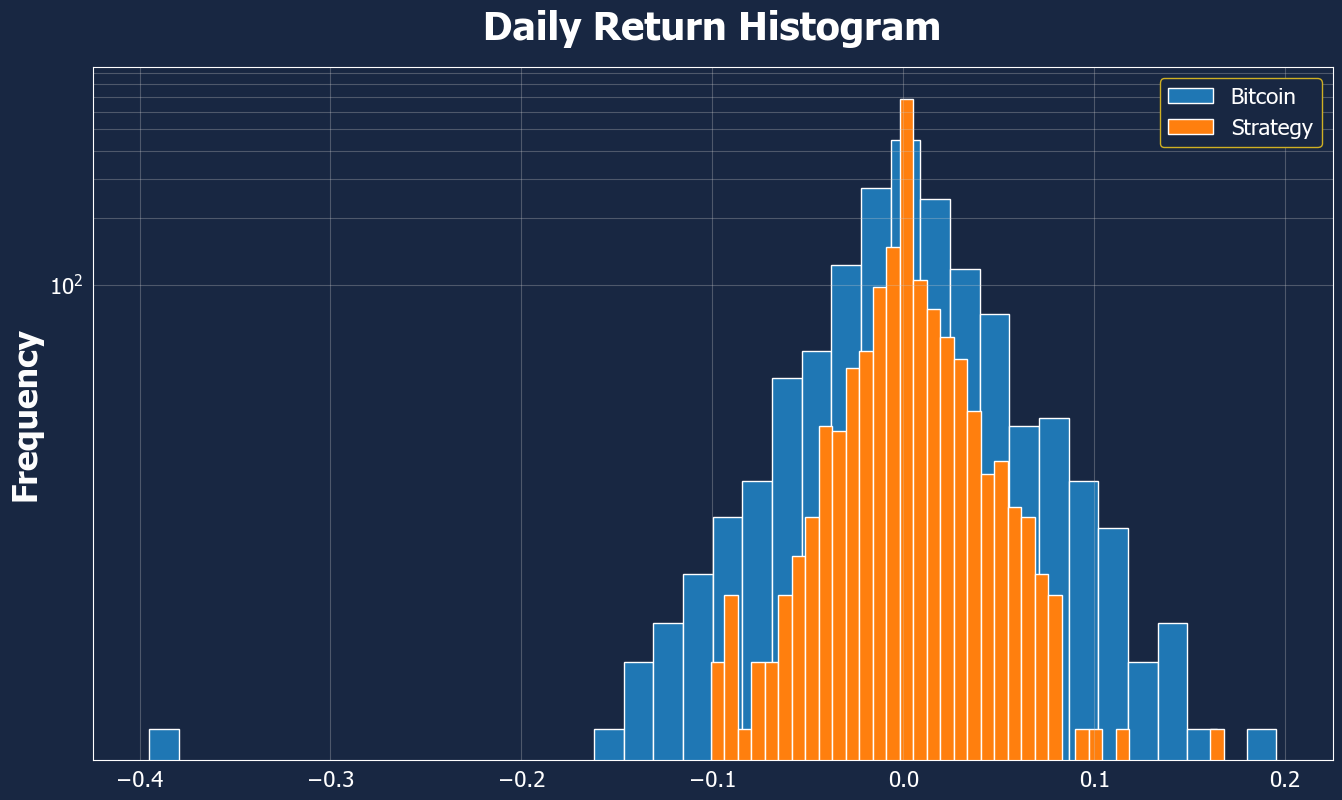

In [17]:
bitcoin_daily_returns = prices['Bitcoin'].pct_change(freq="D")
strategy_daily_returns = prices['Strategy'].pct_change(freq="D")

VaR_95_bitcoin = abs(bitcoin_daily_returns.quantile(0.05))
VaR_95_strategy = abs(strategy_daily_returns.quantile(0.05))

print('Bitcoin VaR =', VaR_95_bitcoin)
print('Strategy VaR =', VaR_95_strategy)

ax = bitcoin_daily_returns.plot(kind='hist', logy=True, legend=True, title='Daily Return Histogram', bins=int(math.sqrt(len(bitcoin_daily_returns))))
strategy_daily_returns.plot(kind='hist', logy=True, legend=True, bins=int(math.sqrt(len(strategy_daily_returns))))

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

PITCH_DECK_METRICS['COMBINED']['VaR (95%)'] = VaR_95_strategy
PITCH_DECK_METRICS['BITCOIN-COMBINED']['VaR (95%)'] = VaR_95_bitcoin


# Calculate Correlation

In [18]:
corr = prices[['Strategy', 'Bitcoin', 'SPY', 'QQQ']].corr()
corr

,Strategy,Bitcoin,SPY,QQQ
Strategy,1.0000,0.6398,0.8605,0.7394
Bitcoin,0.6398,1.0000,0.7783,0.7988
SPY,0.8605,0.7783,1.0000,0.9501
QQQ,0.7394,0.7988,0.9501,1.0000


In [19]:
strategy_corr_bitcoin = corr[['Strategy']].loc['Bitcoin'].iloc[0]
strategy_corr_spy = corr[['Strategy']].loc['SPY'].iloc[0]
PITCH_DECK_METRICS['COMBINED']['Correlation to BTC'] = strategy_corr_bitcoin
PITCH_DECK_METRICS['COMBINED']['Correlation to SPY'] = strategy_corr_spy
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Correlation to BTC'] = 1.0
PITCH_DECK_METRICS['SPY']['Correlation to SPY'] = 1.0
print("Strategy Correlation(Bitcoin) = {:.4}".format(strategy_corr_bitcoin))

Strategy Correlation(Bitcoin) = 0.6398


# Calculate Volatility & Beta

In [20]:
treasury_10y = .0459
strategy_vol = stats['Strategy'].stats['yearly_vol']
bitcoin_vol = stats['Bitcoin'].stats['yearly_vol']
spy_vol = stats['SPY'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(bitcoin_vol))
print("SPY Volatility = {:.4}".format(spy_vol))

Strategy Volatility = 0.8143
Bitcoin Volatility = 1.545
SPY Volatility = 0.2149


# Calculate Beta & Alpha wrt Bitcoin

In [21]:
bitcoin_beta = strategy_corr_bitcoin * (strategy_vol / bitcoin_vol)
PITCH_DECK_METRICS['COMBINED']['Beta (Bitcoin)'] = bitcoin_beta
alpha_bitcoin = PITCH_DECK_METRICS['COMBINED']['CAGR'] - (treasury_10y + bitcoin_beta * (PITCH_DECK_METRICS['BITCOIN-COMBINED']['CAGR'] - treasury_10y))
PITCH_DECK_METRICS['COMBINED']['Alpha (Bitcoin)'] = alpha_bitcoin
print("Strategy Beta (Bitcoin) = {:.4}".format(bitcoin_beta))
print('Alpha(Bitcoin) = {:.2f}%'.format(alpha_bitcoin * 100.))

Strategy Beta (Bitcoin) = 0.3373
Alpha(Bitcoin) = 37.96%


# Calculate Alpha wrt SPY

In [22]:
spy_beta = strategy_corr_spy * (strategy_vol / spy_vol)
PITCH_DECK_METRICS['COMBINED']['Beta (SPY)'] = spy_beta
PITCH_DECK_METRICS['SPY']['Beta (SPY)'] = 1.0
PITCH_DECK_METRICS['SPY']['Alpha (SPY)'] = 0.0
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Beta (Bitcoin)'] = 1.0
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Alpha (Bitcoin)'] = 0.0
treasury_10y = .0459
alpha_spy = PITCH_DECK_METRICS['COMBINED']['CAGR'] - (treasury_10y + bitcoin_beta * (PITCH_DECK_METRICS['SPY']['CAGR'] - treasury_10y))
PITCH_DECK_METRICS['COMBINED']['Alpha (SPY)'] = alpha_spy

print("Strategy Beta(SPY) = {:.4}".format(spy_beta))
print('Alpha = {:.2f}%'.format(alpha_spy * 100.))

Strategy Beta(SPY) = 3.261
Alpha = 53.39%


# Dump Metrics to Centralized File

In [23]:
pdmdf = pd.DataFrame(PITCH_DECK_METRICS)
pdmdf.transpose().to_csv('pitch_deck_metrics.csv')
pdmdf.transpose()

,Month to Date,Year to Date,CAGR,Daily Sortino,Calmar,Max Drawdown,Total Return,Volatility,Sharpe,VaR (95%),Correlation to BTC,Correlation to SPY,Beta (Bitcoin),Alpha (Bitcoin),Beta (SPY),Alpha (SPY)
FUND,0.1832,0.6196,0.2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMBINED,NaN,NaN,0.5988,1.9328,1.8512,-0.3235,5.6353,0.8143,1.1361,0.0304,0.6398,0.8605,0.3373,0.3796,3.2608,0.5339
BITCOIN-FUND,0.1209,1.5561,0.0821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BITCOIN-COMBINED,NaN,NaN,0.5596,1.3451,0.7336,-0.7628,5.0027,1.5446,0.8352,0.0522,1.0000,NaN,1.0000,0.0000,NaN,NaN
SPY,0.0414,0.2429,0.1023,0.6750,0.3000,-0.3410,0.4812,0.2149,0.4525,NaN,NaN,1.0000,NaN,NaN,1.0000,0.0000
QQQ,0.0532,0.5379,0.1789,0.9472,0.5023,-0.3562,0.9421,0.3961,0.6176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
